## LeNet5 Model using CIFAR-10 Image Data

In [65]:
import seaborn as sn
import pandas  as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, Dropout, MaxPooling2D, Flatten,RandomFlip, RandomRotation, RandomZoom, Dropout
from keras.optimizers import SGD
# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import classification_report
from time import time

In [63]:
!conda install keras-gpu

Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions



In [62]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
# 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
x_train.size, y_train.size, x_test.size, y_test.size

(153600000, 50000, 30720000, 10000)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
x_train = x_train / 255
x_test = x_test / 255

In [57]:
def plot_accuracy_loss(history, epochs):
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid(False)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.grid(False)
    plt.show()
    plt.close('all')

In [29]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [30]:
# test model on new image
img_path = 'images/airplane_test_img.jpeg'
img = tf.keras.utils.load_img(img_path, color_mode='rgb', target_size=(32, 32))
img_arr = tf.keras.utils.img_to_array(img)
img_arr = np.array([img_arr])

In [31]:
def get_new_image_predictions(model, img_arr):
    return model.predict(img_arr)

In [59]:
def plot_airplane_predictions(img_prediction, class_names, model_name):
    min_pred = np.min(img_prediction[0])
    max_pred = np.max(img_prediction[0])
    scaled_pred = (img_prediction[0] - min_pred)/(max_pred - min_pred)

    fig, ax = plt.subplots()
    ax.bar(class_names, scaled_pred)
    ax.set_ylabel('Prediction')
    ax.set_title(f'Model Airplane Prediction {model_name}')
    
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()
    plt.close('all')

# ---------- LeNet5 Model ----------

In [80]:
# https://www.kaggle.com/code/blurredmachine/lenet-architecture-a-complete-guide
def build_lenet5_model():
    tf.random.set_seed(42)
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Activation('relu'))
    model.add(Dense(84))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [10]:
model_lenet5 = build_lenet5_modelLe()
# stochastic gradient descent optimizer
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

start_time = time()
model_lenet5.compile(loss='categorical_crossentropy', optimizer=sgd, 
                   metrics=['accuracy','binary_accuracy','categorical_accuracy','categorical_crossentropy'])
end_time = time() - start_time
print(f'LeNet5 Model 2 took {end_time} seconds to compile')
model_lenet5.summary()

LeNet5 Model 2 took 0.003092050552368164 seconds to fit
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 activation_5 (Activation)   (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 activation_6 (Activation)   (None, 10, 10, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0        

In [11]:
start_time = time()
history_lenet5_model = model_lenet5.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test,y_test), shuffle=True, verbose=0)
end_time = time() - start_time
print(f'LeNet5 Model took {end_time} seconds to fit')

LeNet5 Model 2 took 305.94488072395325 seconds to fit


In [12]:
start_time = time()
model_base_score = model_lenet5.evaluate(x_test, y_test, verbose=0)
model_base_score_time = time() - start_time
print(f'LeNet5 model took {model_base_score_time} seconds to score')

LeNet5 model 2 took 0.6012768745422363 seconds to score


In [33]:
model_lenet5_score_dict = dict(zip(model_lenet5.metrics_names, model_base_score))
model_lenet5_score_dict

{'loss': 1.715778112411499,
 'accuracy': 0.5774000287055969,
 'binary_accuracy': 0.924340009689331,
 'categorical_accuracy': 0.5774000287055969,
 'categorical_crossentropy': 1.715778112411499}

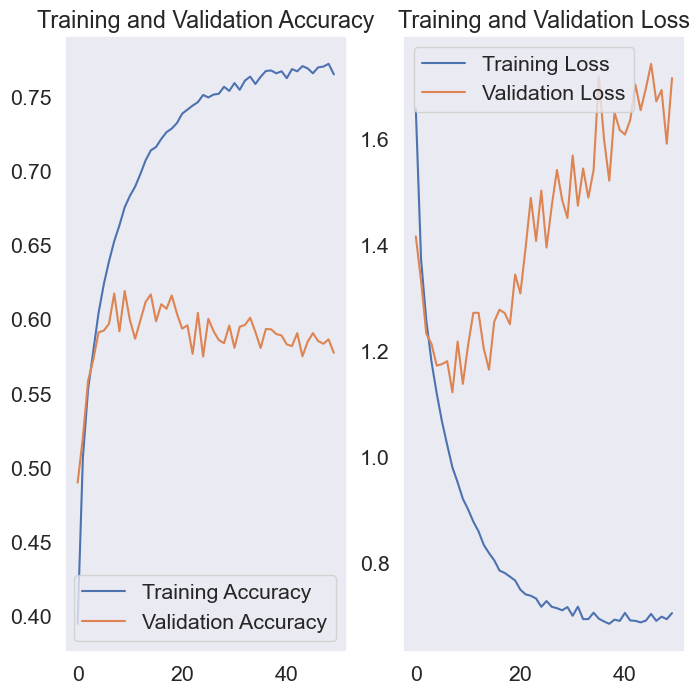

In [58]:
plot_accuracy_loss(history_lenet5_model, 50)

1/1 [==============================] - 0s 11ms/step


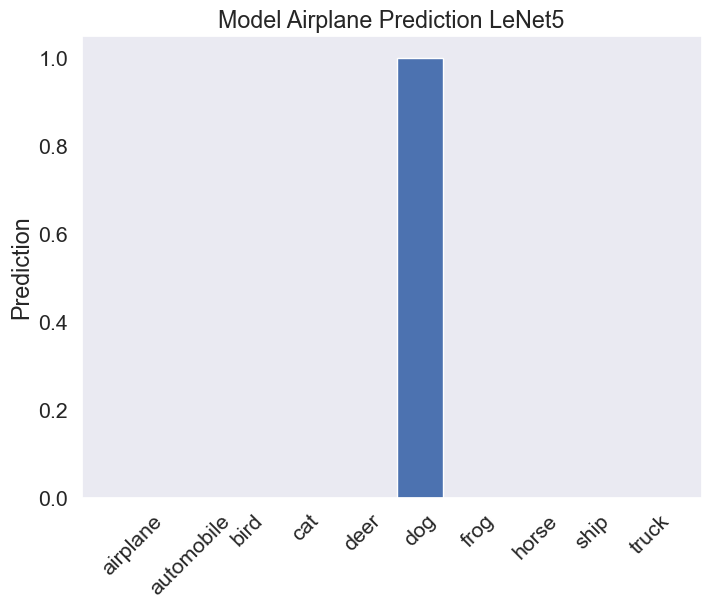

In [60]:
lenet5_prediction = get_new_image_predictions(model_lenet5, img_arr)
plot_airplane_predictions(lenet5_prediction, class_names, 'LeNet5')

# ---------- LeNet5 Model + Image Augmentation ----------

In [43]:
def build_lenet5_image_augmentation():
    tf.random.set_seed(42)
    model = Sequential()
    # image augmentation
    model.add(RandomFlip("horizontal", input_shape=(32, 32, 3)))
    model.add(RandomRotation(0.1))
    model.add(RandomZoom(0.1))
    
    model.add(Conv2D(6, kernel_size=(5, 5), input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Activation('relu'))
    model.add(Dense(84))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [66]:
model_lenet5_aug = build_lenet5_image_augmentation()
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

start_time = time()
model_lenet5_aug.compile(loss='categorical_crossentropy', optimizer=sgd, 
                   metrics=['accuracy','binary_accuracy','categorical_accuracy','categorical_crossentropy'])
end_time = time() - start_time
print(f'LeNet5 Aug. Model took {end_time} seconds to compile')

LeNet5 Aug. Model took 0.003155946731567383 seconds to compile


In [67]:
start_time = time()
history_lenet5_aug_model = model_lenet5_aug.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test,y_test), shuffle=True, verbose=0)
end_time = time() - start_time
print(f'Alexnet Aug. Model took {end_time} seconds to fit')

Alexnet Aug. Model took 457.9113838672638 seconds to fit


In [68]:
start_time = time()
model_lenet5_aug_score = model_lenet5_aug.evaluate(x_test, y_test, verbose=0)
end_time = time() - start_time
print(f'LeNet5 Aug. Model took {end_time} seconds to score')

LeNet5 Aug. Model took 0.5623428821563721 seconds to score


In [69]:
model_lenet5_aug_score_dict = dict(zip(model_lenet5_aug.metrics_names, model_lenet5_aug_score))
model_lenet5_aug_score_dict

{'loss': 1.207258701324463,
 'accuracy': 0.5946999788284302,
 'binary_accuracy': 0.9291495084762573,
 'categorical_accuracy': 0.5946999788284302,
 'categorical_crossentropy': 1.207258701324463}

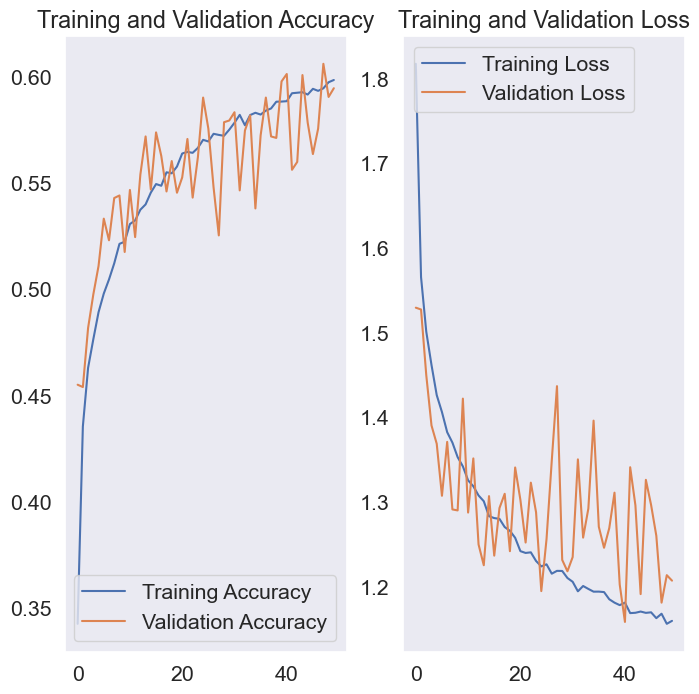

In [70]:
plot_accuracy_loss(history_lenet5_aug_model, 50)

1/1 [==============================] - 0s 41ms/step


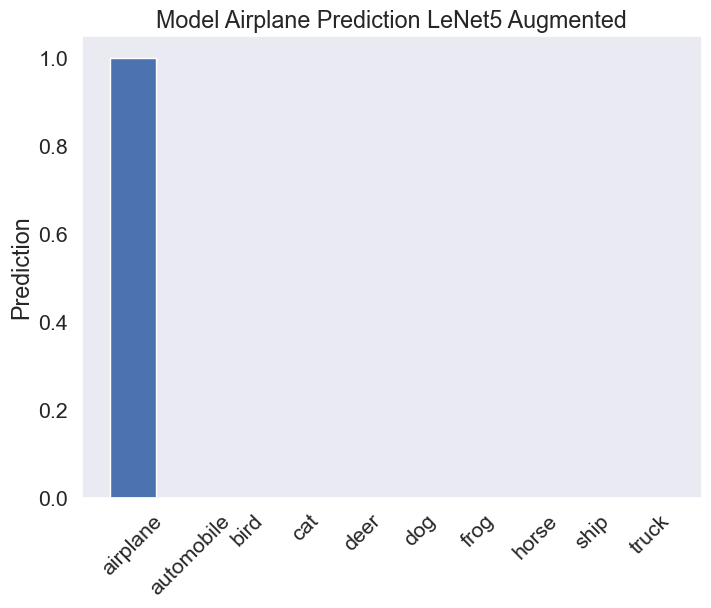

In [71]:
lenet5_aug_prediction = get_new_image_predictions(model_lenet5_aug, img_arr)
plot_airplane_predictions(lenet5_aug_prediction, class_names, 'LeNet5 Augmented')

# ---------- LeNet5 Model + Image Augmentation + Dropout ----------

In [72]:
def build_lenet5_image_augmentation_dropout():
    tf.random.set_seed(42)
    model = Sequential()
    # image augmentation
    model.add(RandomFlip("horizontal", input_shape=(32, 32, 3)))
    model.add(RandomRotation(0.1))
    model.add(RandomZoom(0.1))
    
    model.add(Conv2D(6, kernel_size=(5, 5), input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Activation('relu'))
    model.add(Dense(84))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [73]:
model_lenet5_aug_dropout = build_lenet5_image_augmentation_dropout()
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

start_time = time()
model_lenet5_aug_dropout.compile(loss='categorical_crossentropy', optimizer=sgd, 
                   metrics=['accuracy','binary_accuracy','categorical_accuracy','categorical_crossentropy'])
end_time = time() - start_time
print(f'LeNet5 Aug. Dropout Model took {end_time} seconds to compile')

LeNet5 Aug. Dropout Model took 0.0023758411407470703 seconds to compile


In [74]:
start_time = time()
history_lenet5_aug_dropout_model = model_lenet5_aug_dropout.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test,y_test), shuffle=True, verbose=0)
end_time = time() - start_time
print(f'LeNet5 Aug. Dropout Model took {end_time} seconds to fit')

LeNet5 Aug. Dropout Model took 463.9671149253845 seconds to fit


In [75]:
start_time = time()
model_lenet5_aug_dropout_score = model_lenet5_aug_dropout.evaluate(x_test, y_test, verbose=0)
end_time = time() - start_time
print(f'LeNet5 Aug. Dropout Model took {end_time} seconds to score')

LeNet5 Aug. Dropout Model took 0.6118850708007812 seconds to score


In [76]:
model_lenet5_aug_dropout_score_dict = dict(zip(model_lenet5_aug_dropout.metrics_names, model_lenet5_aug_dropout_score))
model_lenet5_aug_dropout_score_dict

{'loss': 1.1999571323394775,
 'accuracy': 0.5910999774932861,
 'binary_accuracy': 0.9292500019073486,
 'categorical_accuracy': 0.5910999774932861,
 'categorical_crossentropy': 1.1999571323394775}

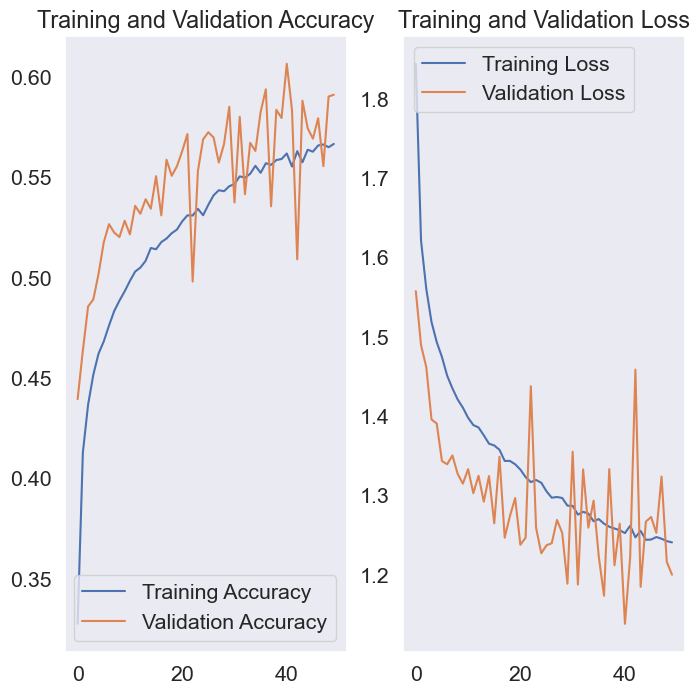

In [77]:
plot_accuracy_loss(history_lenet5_aug_dropout_model, 50)

1/1 [==============================] - 0s 37ms/step


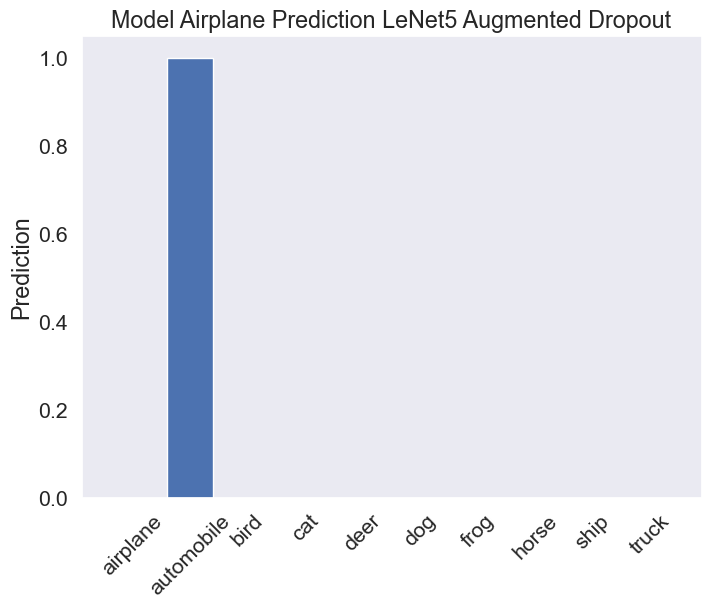

In [78]:
lenet5_aug_dropout_prediction = get_new_image_predictions(model_lenet5_aug_dropout, img_arr)
plot_airplane_predictions(lenet5_aug_dropout_prediction, class_names, 'LeNet5 Augmented Dropout')

In [79]:
df_lenet5 = pd.DataFrame([
    model_lenet5_score_dict,
    model_lenet5_aug_score_dict,
    model_lenet5_aug_dropout_score_dict]
)
row_names = {
    0:'LeNet5',
    1:'LeNet5 Augmented',
    2:'LeNet5 Augmented Dropout'
}
df_lenet5.rename(index=row_names, inplace=True)
df_lenet5

,loss,accuracy,binary_accuracy,categorical_accuracy,categorical_crossentropy
LeNet5,1.715778,0.5774,0.92434,0.5774,1.715778
LeNet5 Augmented,1.207259,0.5947,0.92915,0.5947,1.207259
LeNet5 Augmented Dropout,1.199957,0.5911,0.92925,0.5911,1.199957
